In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, ndcg_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import torch
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

In [2]:
train_data = pd.read_csv('train_df.csv')
test_data = pd.read_csv('test_df.csv')

In [3]:
N_THREADS = 4
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.2
TIMEOUT = 1000
TARGET_NAME = 'target'

np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [4]:
task = Task(
    name='binary',
    metric = lambda y_true, y_pred: ndcg_score(y_true.reshape(1, -1), y_pred.reshape(1, -1)),
)
roles = {
    'target': TARGET_NAME,
}

In [5]:
automl = TabularAutoML(
    task = task, 
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
)

automl.fit_predict(train_data, roles = roles, verbose = 1)
test_pred = automl.predict(test_data).data
ndcg_test_lama = ndcg_score(test_data['target'].to_numpy().reshape(1, -1), test_pred.reshape(1, -1))

[20:47:00] Stdout logging level is INFO.
[20:47:00] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[20:47:00] Task: binary

[20:47:00] Start automl preset with listed constraints:
[20:47:00] - time: 1000.00 seconds
[20:47:00] - CPU: 4 cores
[20:47:00] - memory: 16 GB

[20:47:00] Train data shape: (15081, 81)

[20:47:04] Layer 1 train process start. Time left 996.19 secs
[20:47:05] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[20:47:05] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.6121701135729735
[20:47:05] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[20:47:05] Time left 994.71 secs

[20:47:07] Selector_LightGBM fitting and predicting completed
[20:47:08] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[20:47:14] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.6803178181864787
[20:47:14] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[20:47:14] Start hyperparameters optimization for Lvl

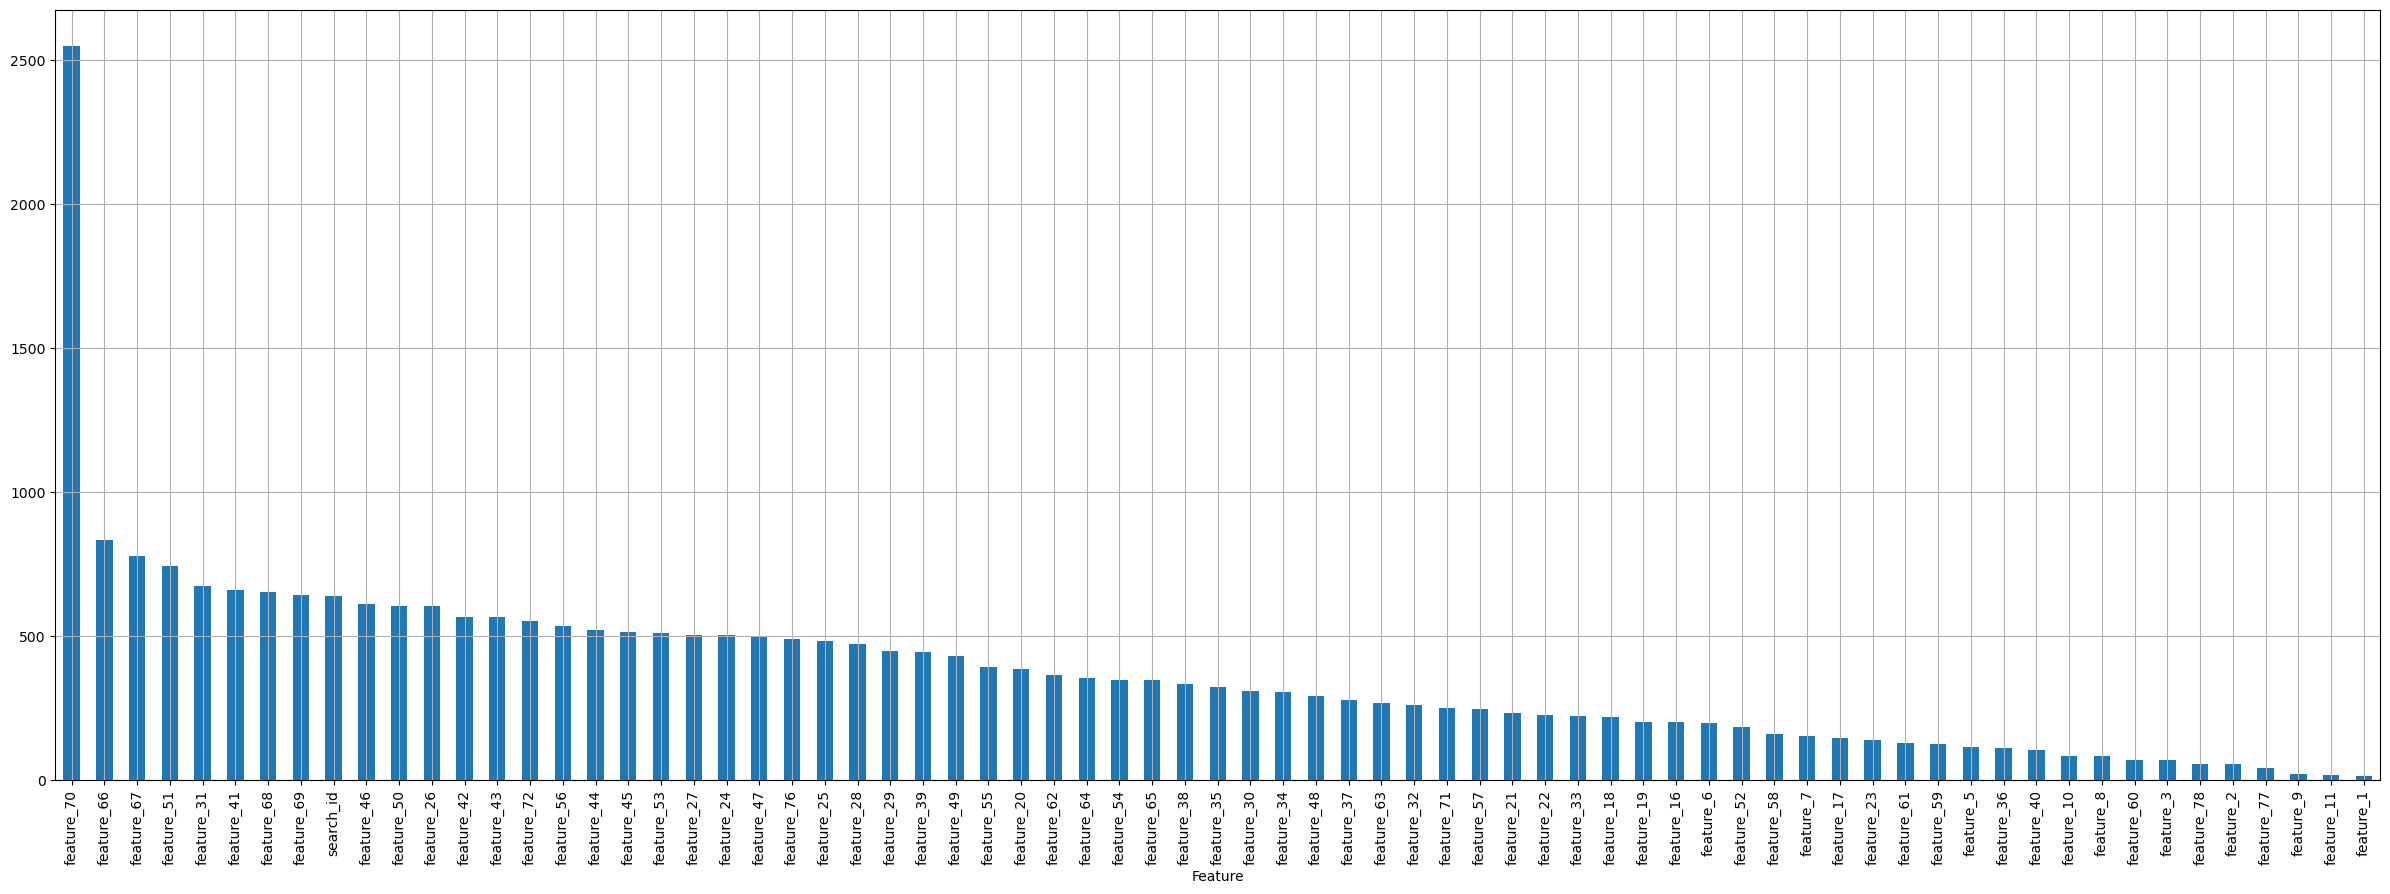

In [8]:
feature_importance = automl.get_feature_scores('fast', silent=False)
feature_importance.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)
plt.show()

In [7]:
test_pred = automl.predict(test_data).data
ndcg_test_lama = ndcg_score(test_data['target'].to_numpy().reshape(1, -1), test_pred.reshape(1, -1))
print(f'NDCG on test data: {ndcg_test_lama.round(3)}')

NDCG on test data: 0.555
